In [4]:
import json
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [71]:
print(os.getcwd())
with open('../../../target/result.json') as f:
    data = json.load(f)
    dfAll = pd.DataFrame(data)
    
dfAll = dfAll.loc[dfAll['nMsg']==1_000_000]
dfAll['msgPerSec'] = dfAll['msgPerSec'].apply(lambda x: x /1_000_000)
dfAll = dfAll.rename(columns={'nWin': 'Windows'})
dfAll


/Users/terenceng/Documents/KTH/2024 Digital Future/Windowed-CRDT/src/main/python


,nMsg,Windows,nActor,nWinPerAwait,msgPerSec,time
1,1000000,0,1,1,0.448029,2.232
2,1000000,0,2,1,1.021972,1.957
3,1000000,0,3,1,1.301518,2.305
4,1000000,0,4,1,1.504325,2.659
5,1000000,0,5,1,1.666111,3.001
...,...,...,...,...,...,...
175,1000000,400,1,10,0.264901,3.775
176,1000000,400,2,10,0.355114,5.632
177,1000000,400,3,10,0.366524,8.185
178,1000000,400,4,10,0.337952,11.836


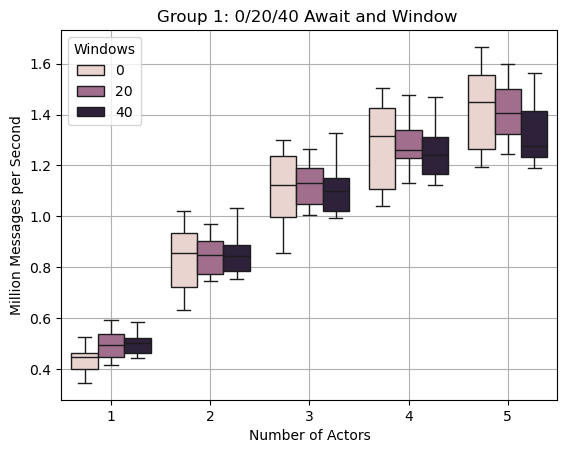

In [72]:
fig, ax = plt.subplots()

df = dfAll.loc[dfAll['nWinPerAwait']==1].loc[dfAll['Windows'].isin([0,20,40])]
df = df[['nActor', 'msgPerSec','Windows']]
p = sns.boxplot(
    x='nActor', 
    y='msgPerSec', 
    data=df, 
    ax = ax,
    hue='Windows'
    )

ax.set_xlabel('Number of Actors')
ax.set_ylabel('Million Messages per Second')

ax.grid()
ax.title.set_text('Group 1: 0/20/40 Await and Window ')
plt.show()

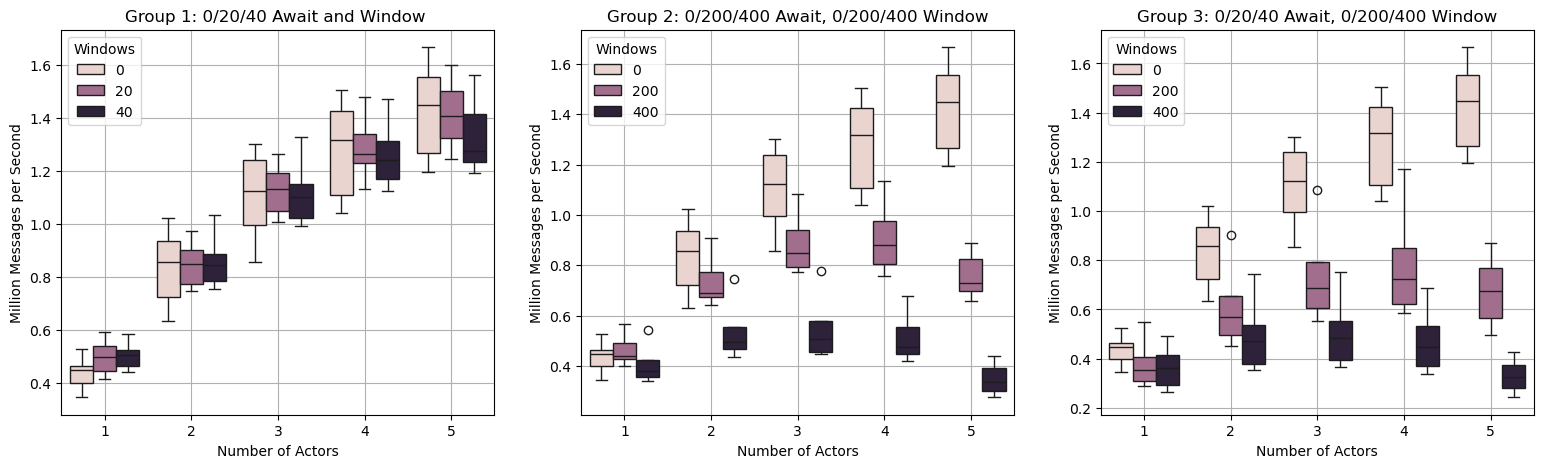

In [82]:
fig, axs = plt.subplots(1, 3, figsize = (19,5))

# plot 1
ax = axs[0]

df = dfAll.loc[dfAll['nWinPerAwait']==1].loc[dfAll['Windows'].isin([0,20,40])]
df = df[['nActor', 'msgPerSec','Windows']]
p = sns.boxplot(
    x='nActor', 
    y='msgPerSec', 
    data=df, 
    ax = ax,
    hue='Windows'
    )

ax.set_xlabel('Number of Actors')
ax.set_ylabel('Million Messages per Second')

ax.grid()
ax.title.set_text('Group 1: 0/20/40 Await and Window ')

# plot 2
ax = axs[1]

df = dfAll.loc[dfAll['nWinPerAwait']==1].loc[dfAll['Windows'].isin([0,200,400])]
df = df[['nActor', 'msgPerSec','Windows']]
p = sns.boxplot(
    x='nActor', 
    y='msgPerSec', 
    data=df, 
    ax = ax,
    hue='Windows'
    )

ax.set_xlabel('Number of Actors')
ax.set_ylabel('Million Messages per Second')

ax.grid()
ax.title.set_text('Group 2: 0/200/400 Await, 0/200/400 Window')

# plot 3
ax = axs[2]

df = dfAll.loc[dfAll['nWinPerAwait']==10].loc[dfAll['Windows'].isin([200,400])]
df = pd.concat([df, dfAll.loc[dfAll['Windows']==0]])
df = df[['nActor', 'msgPerSec','Windows']]
p = sns.boxplot(
    x='nActor', 
    y='msgPerSec', 
    data=df, 
    ax = ax,
    hue='Windows'
    )

ax.set_xlabel('Number of Actors')
ax.set_ylabel('Million Messages per Second')

ax.grid()
ax.title.set_text('Group 3: 0/20/40 Await, 0/200/400 Window')

plt.show()
fig.savefig('../../../target/result.png', dpi=300)